In [1]:
%load_ext autoreload
%autoreload 2

import os, sys
import pandas as pd
import numpy as np
import glob
import pickle
import pylab as plt
import matplotlib
from matplotlib.pyplot import get_cmap
%matplotlib inline  
from scipy.spatial.distance import cdist

src_dir = os.path.abspath(os.path.join(os.pardir,'src'))
sys.path[0] = src_dir



In [8]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 480  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
Ampl = 1.0 # Amplification factor for screen: set this to ONE for final plot of eps
fig_size = [Ampl*fig_width,Ampl*fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.labelsize': Ampl*10,
          'text.fontsize': Ampl*8,
          'legend.fontsize': Ampl*6,
          'xtick.labelsize': Ampl*8,
          'ytick.labelsize': Ampl*8,
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          #'figtext.fontsize': Ampl*10,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          'xtick.direction':'out',
          'ytick.direction':'out'
         }
plt.rcParams.update(params)

/home/martin/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:913: UserWarning: text.fontsize is deprecated and replaced with font.size; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [9]:
x_bottom = 0.1
x_left = 0.15
x_right = 0.95
x_top = 0.95
x_h=0.15
x_w=0.2

In [10]:
cmap = get_cmap('tab10')
list_colors = ['#e66101','#5e3c99']

## read age and gender

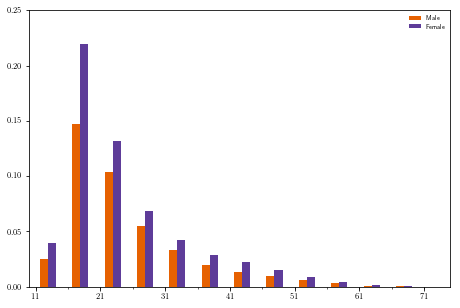

In [14]:
fig = plt.figure(figsize=fig_size)
plt.clf()

#####################################################
## Load data
path_read = '../data_filter/'
fname_read = 'df_demo_ipip300-no0.csv'
filename = os.path.join(path_read,fname_read)
df = pd.read_csv(filename,index_col=0).dropna()

#     df['age']=df['age'].replace(np.nan,80)
#     df['gender']=df['gender'].replace(np.nan,2)

list_g = np.array([0,1])
list_a = np.arange(11,134,5)

delta_a = list_a[1]-list_a[0]

arr_g = np.array(df['gender'].values).astype('float')
arr_a = df['age'].values
N = len(arr_a)

list_arr_ga = []
n_tot = 0
for g in list_g:
    inds_g_sel = np.where(arr_g==g)[0]
    arr_a_sel = arr_a[inds_g_sel]
    list_n_ga = []
    for i_a in range(len(list_a)-1):
        a1 = list_a[i_a]
        a2 = list_a[i_a+1]
        n_ga = np.sum( (arr_a_sel>=a1)*(arr_a_sel<a2)   )
        list_n_ga+=[n_ga]
        n_tot += n_ga
    list_arr_ga += [np.array(list_n_ga)]
ax = fig.add_subplot(1,1,1 )
list_labels = ['Male','Female','N/A']
list_colors = ['#e66101','#5e3c99','#4daf4a']
for i_g,arr_ga in enumerate(list_arr_ga):
    x = list_a[:-1]
    y = arr_ga/float(n_tot)# 

    dx = 1.25
    xshift = delta_a/3+(i_g-0.33)*dx

    ax.bar(x+xshift,y,label=list_labels[i_g],\
           color = list_colors[i_g],width=dx)




## xticks labels
ax.set_xticks(list_a,minor=True)
ax.set_xticks(list_a[::2])
ax.set_xticklabels([r'$%s$'%(h) for h in [11,21,31,41,51,61,71]])

ax.set_xlim(10,75)  
ax.set_ylim(0,0.25)
plt.legend(frameon=False)
plt.subplots_adjust(left=x_left,bottom=x_bottom,right=x_right,top=x_top,hspace=x_h,wspace=x_w)

